# install dependencies

In [ ]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [ ]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 17.0184011732792335, performing 24.1 it/sec
Step 100: Loss = 1.9866720405392215, performing 125.3 it/sec
Step 200: Loss = 0.2266502978628853, performing 193.7 it/sec
Step 300: Loss = 0.1357260330107263, performing 274.4 it/sec
Step 400: Loss = 0.0624565100113991, performing 262.2 it/sec
Step 500: Loss = 0.0076580687004479, performing 252.9 it/sec
No improvement since Step 487, early stopping.
[Best]  Step 486: Loss = 0.0022667124699150
[Final] Step 536: Loss = 0.0059152792858973

predicted end states
------------------------------------
         5th       Mean      95th
MELF-1  4.40e+00  4.40e+00  4.40e+00
MELF-2  1.00e-01  1.00e-01  1.00e-01
MELF-3  4.55e-07  4.55e-07  4.55e-07
MELF-4  4.68e-10  4.68e-10  4.68e-10
MELF-5  4.55e-09  4.55e-09  4.55e-09
MELF-6  1.05e-11  1.05e-11  1.05e-11
MELF-7  4.51e-11  4.51e-11  4.51e-11
MELF-8 

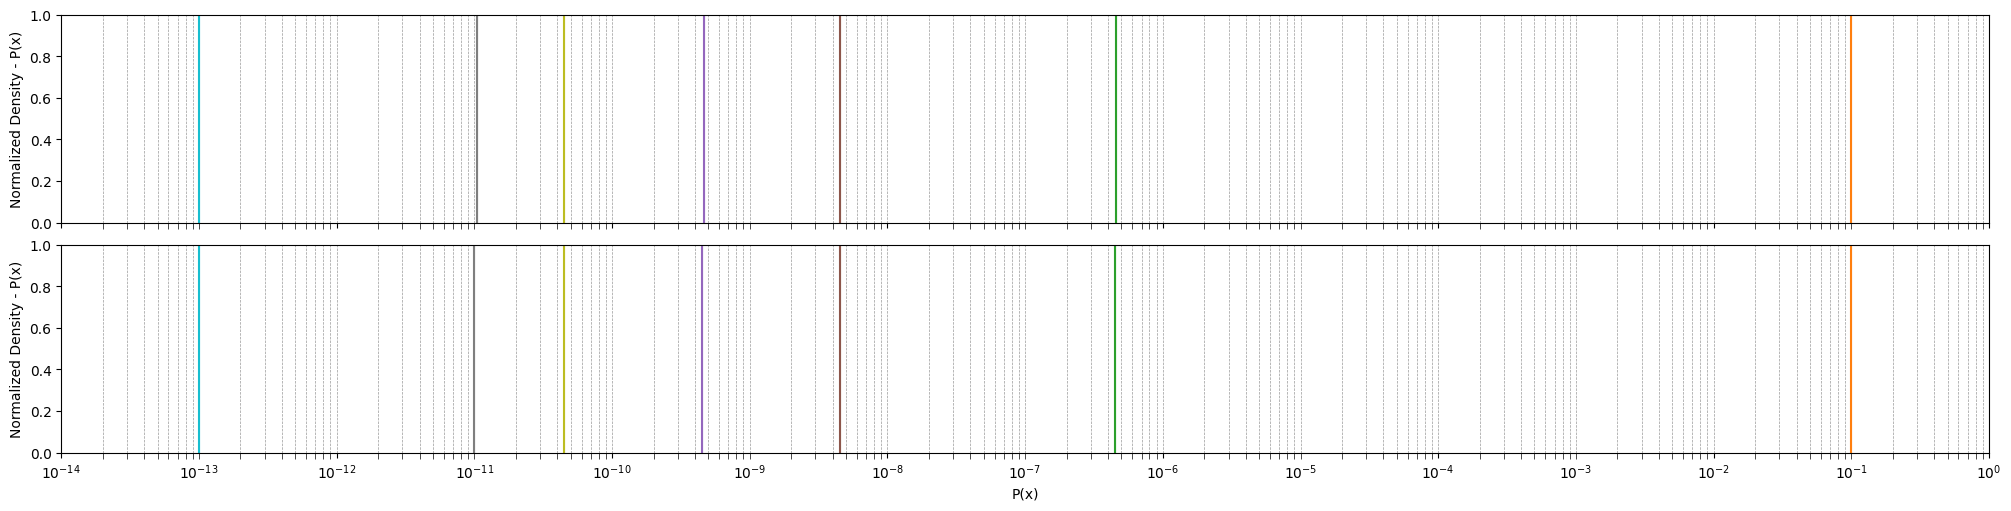

In [ ]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 4.5,
 'freeze_initiating_event': True,
}

conditional_events = {
    'names': ['MELF', 'NPPE', 'SLPE', 'DETP', 'SHTS', 'NSSP|~SHTS', 'NSSP|SHTS', 'NSSP|DETP'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'MELF-1': {
        'sequence': [1, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 4.4,
    },
    'MELF-2': {
        'sequence': [1, 1, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': .1,
    },
    'MELF-3': {
        'sequence': [1, 1, 1, 0, 0, 0, np.nan, np.nan],
        'probability': 4.5e-7,
    },
    'MELF-4': {
        'sequence': [1, 1, 1, 0, 0, 1, np.nan, np.nan],
        'probability': 4.5e-10,
    },
    'MELF-5': {
        'sequence': [1, 1, 1, 0, 1, np.nan, 0, np.nan],
        'probability': 4.5e-9
    },
    'MELF-6': {
        'sequence': [1, 1, 1, 0, 1, np.nan, 1, np.nan],
        'probability': 1e-11
    },
    'MELF-7': {
        'sequence': [1, 1, 1, 1, np.nan, np.nan, np.nan, 0],
        'probability': 4.5e-11
    },
    'MELF-8': {
        'sequence': [1, 1, 1, 1, np.nan, np.nan, np.nan, 1],
        'probability': 1e-13
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)